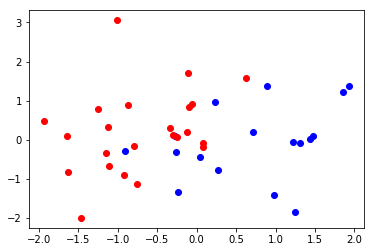

[-1.72760123]


In [9]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
import time

# definition of constant values
n = 40
lam = 1

# create dataset
omega = np.random.randn(1)
noise = 0.8 * np.random.randn(n)
x = np.random.randn(n, 2)
y = np.where(omega * x[:, 0] + x[:, 1] + noise > 0, 1, -1)

# plot dataset
def plot_dataset(show=True, axes=plt):
    for data, label in zip(x,y):
        color= 'b' if label < 0 else 'r'
        axes.plot(data[0], data[1], color+'o')
    if show: plt.show()
        
plot_dataset()
print(omega)

In [10]:
# declation of variables
w1 = Symbol('w1')
w2 = Symbol('w2')
w = np.array([w1, w2])

# define J(w)
j = sum([log(exp(tmp) + 1) for tmp in -y * np.sum(w * x, axis=1)]) + lam * sum(w * w) 
    

# batch steepest gradient method
def gradient_method(epoch=10, lr=0.2):
    grad = diff(j, w)
    omega = np.ones_like(w)
    js = []
    t = time.time()
    for step in range(epoch + 1):
        js.append(j.subs([(w1, omega[0]), (w2, omega[1])]))
        print('{:02d} step:\tJ={}\tw={}'.format(step, js[step], omega))
        omega = omega - lr * grad.subs([(w1, omega[0]), (w2, omega[1])])
    print("Finish training in {} ms.".format(time.time() - t))
        
    fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))
    # plot J_t
    axL.plot(np.arange(epoch+1), np.array(js))
    # plot datasets and draw boundary
    axR.set_ylim([x[:, 1].min() - 1, x[:, 1].max() + 1])
    v1 = np.linspace(x[:, 0].min(), x[:, 0].max(), 100)
    v2 = - omega[0] / omega[1] * v1
    axR.plot(v1, v2, 'g-')
    plot_dataset(False, axes=axR)
    
    
# Newton based method
def newton_method(epoch=10):
    t= time.time()
    omega = np.ones_like(w)
    d1, d2 = Symbol('d1'), Symbol('d2')
    d = np.array([d1, d2])
    js = []
    for step in range(epoch + 1):
        js.append(j.subs([(w1, omega[0]), (w2, omega[1])]))
        print('{:02d} step:\tJ={}\tw={}'.format(step, js[step], omega))
        grad = diff(j, w).subs([(w1, omega[0]), (w2, omega[1])])
        hesian = np.array(diff(j, w, 2).subs([(w1, omega[0]), (w2, omega[1])])).reshape(2, 2)
        omega  += np.array(list(solve(np.dot(hesian, d) + grad).values()))
    print("Finish training in {} ms.".format(time.time() - t))
        
    fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))
    # plot J_t
    axL.plot(np.arange(epoch+1), np.array(js))
    # plot datasets and draw boundary
    axR.set_ylim([x[:, 1].min() - 1, x[:, 1].max() + 1])
    v1 = np.linspace(x[:, 0].min(), x[:, 0].max(), 100)
    v2 = - omega[0] / omega[1] * v1
    axR.plot(v1, v2, 'g-')
    plot_dataset(False, axes=axR)

00 step:	J=49.9655645766124	w=[1 1]
01 step:	J=32.8901197657918	w=[-3.84483925792007 -0.356408352421527]
02 step:	J=18.4407673499315	w=[-2.06588616924298 0.848188809916864]
03 step:	J=17.5947658366734	w=[-1.57421211589646 0.617759585755042]
04 step:	J=17.5793545987622	w=[-1.55119651727729 0.528357833814109]
05 step:	J=17.5781337384207	w=[-1.52712383519538 0.561518164137345]
06 step:	J=17.5775395745222	w=[-1.54452889283103 0.537980131548856]
07 step:	J=17.5772217950682	w=[-1.53195972236252 0.554859604065898]
08 step:	J=17.5770629775708	w=[-1.54093174688500 0.542760566463555]
09 step:	J=17.5769796313864	w=[-1.53447661968314 0.551438947210836]
10 step:	J=17.5769373933620	w=[-1.53909471038150 0.545216830996097]
Finish training in 2.2879269123077393 ms.


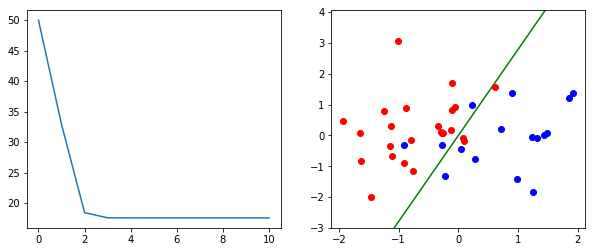

In [11]:
# run the batch steepest gradient method and show the result.
gradient_method()

In [ ]:
# run the Newton based method and show the result.
newton_method()

00 step:	J=49.9655645766124	w=[1 1]
01 step:	J=23.6073482841045	w=[-2.46253566025300 -0.405319939889315]
02 step:	J=19.0807084018736	w=[-0.987711012236914 0.764060048342726]
03 step:	J=17.6027474999910	w=[-1.45018904191655 0.555453839688346]
04 step:	J=17.5769109235808	w=[-1.53478631367859 0.547963996131572]
05 step:	J=17.5768923335759	w=[-1.53715755109642 0.547816161307765]
06 step:	J=17.5768923335655	w=[-1.53715932857041 0.547816071565802]
07 step:	J=17.5768923335655	w=[-1.53715932857140 0.547816071565762]
08 step:	J=17.5768923335656	w=[-1.53715932857140 0.547816071565762]
09 step:	J=17.5768923335655	w=[-1.53715932857140 0.547816071565762]
